# Exponential Smoothing on Environment Dataset

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Esha\Desktop\done\environmenr.csv')
data = pd.read_csv(file_path)
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'environmenr.csv'

In [13]:
data = data[data['CO2EmissionRate (mt)'] != '-']
data['CO2EmissionRate (mt)'] = data['CO2EmissionRate (mt)'].replace(',', '', regex=True).astype(float)
print(data)

                  Country  Year  CO2EmissionRate (mt)
0             Afghanistan  2021                  8.35
1                 Albania  2021                  4.59
2                 Algeria  2021                173.00
3                  Angola  2021                 24.45
4     Antigua and Barbuda  2021                  0.78
...                   ...   ...                   ...
5567            Venezuela  2018                  3.70
5568              Vietnam  2018                  2.80
5569                Yemen  2018                  0.40
5570               Zambia  2018                  0.30
5571             Zimbabwe  2018                  0.80

[5450 rows x 3 columns]


In [14]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)
data.index = data.index.to_period('A')

data = data[data['CO2EmissionRate (mt)'] > 0]

model = ExponentialSmoothing(data['CO2EmissionRate (mt)'], trend='add', seasonal=None)
fitted_model = model.fit()

aic = fitted_model.aic
bic = fitted_model.bic
alpha = fitted_model.params['smoothing_level']
beta = fitted_model.params['smoothing_trend']
initial_level = fitted_model.params['initial_level']
initial_trend = fitted_model.params['initial_trend']


print(f"AIC: {aic}, BIC: {bic}")
print(f"Smoothing Level (α): {alpha}")
print(f"Smoothing Trend (β): {beta}")
print(f"Initial Level: {initial_level}, Initial Trend: {initial_trend}")

C:\Users\Esha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Esha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


AIC: 56329.2463872273, BIC: 56355.58654218054
Smoothing Level (α): 0.05214285714285714
Smoothing Trend (β): 0.02317460317460317
Initial Level: 6.255999999999986, Initial Trend: 14.174000000000003


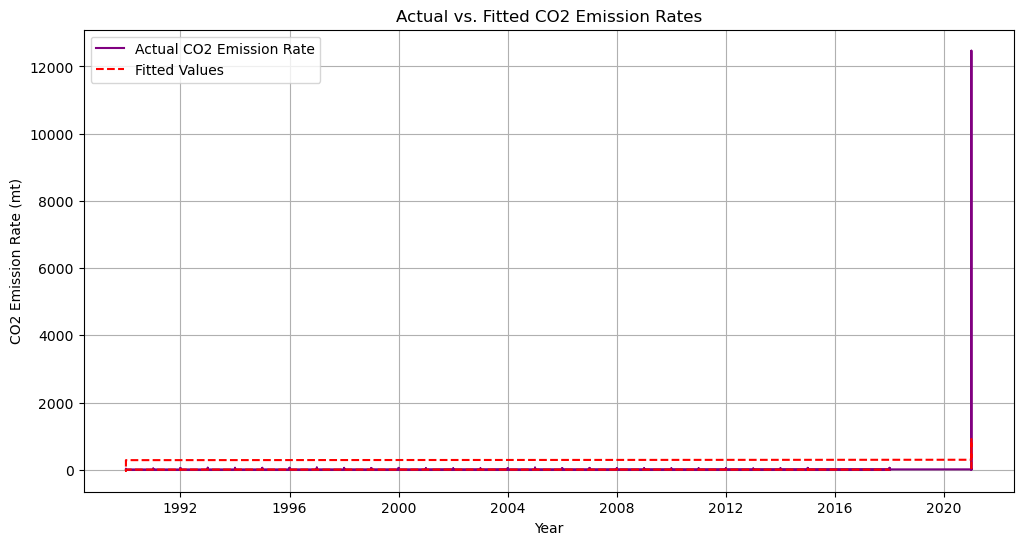

In [15]:
data.index = data.index.to_timestamp()
fitted_values = fitted_model.fittedvalues
fitted_values.index = fitted_values.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO2EmissionRate (mt)'], label='Actual CO2 Emission Rate', color='purple')
plt.plot(fitted_values.index, fitted_values, label='Fitted Values', color='red', linestyle='--')
plt.title('Actual vs. Fitted CO2 Emission Rates')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Rate (mt)')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import pickle
with open('est_envir.pkl', 'wb') as f:
    pickle.dump(fitted_model, f)